In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("architsharma01/loan-approval-prediction-dataset")

print("Path to dataset files:", path)

100%|██████████| 80.6k/80.6k [00:00<00:00, 179kB/s]

Extracting files...
Path to dataset files: C:\Users\brais\.cache\kagglehub\datasets\architsharma01\loan-approval-prediction-dataset\versions\1


In [4]:
import pandas as pd
df=pd.read_csv('loan_approval_dataset.csv')
df.head(10)


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected


In [5]:
# Dropping the column load_id
df.drop(columns=["loan_id"], inplace=True)

In [18]:
df.columns=df.columns.str.strip()

In [22]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df["education"] = encoder.fit_transform(df["education"])
df["self_employed"]=encoder.fit_transform(df["self_employed"])
df["loan_status"]=encoder.fit_transform(df["loan_status"])

df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [25]:
# Checking if there is null values
df.isnull().sum()

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['loan_status'])
y=df['loan_status']
X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=42)

In [ ]:
# Training a decison tree
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=42)

# Train the model
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [36]:
from sklearn.metrics import accuracy_score, classification_report
y_pred=model.predict(X_test)

# Evaluate accuracy
print("accuracy:", accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred, target_names=["Rejected", "Approved"]))


accuracy: 0.968384074941452
              precision    recall  f1-score   support

    Rejected       0.99      0.96      0.97       536
    Approved       0.94      0.98      0.96       318

    accuracy                           0.97       854
   macro avg       0.96      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



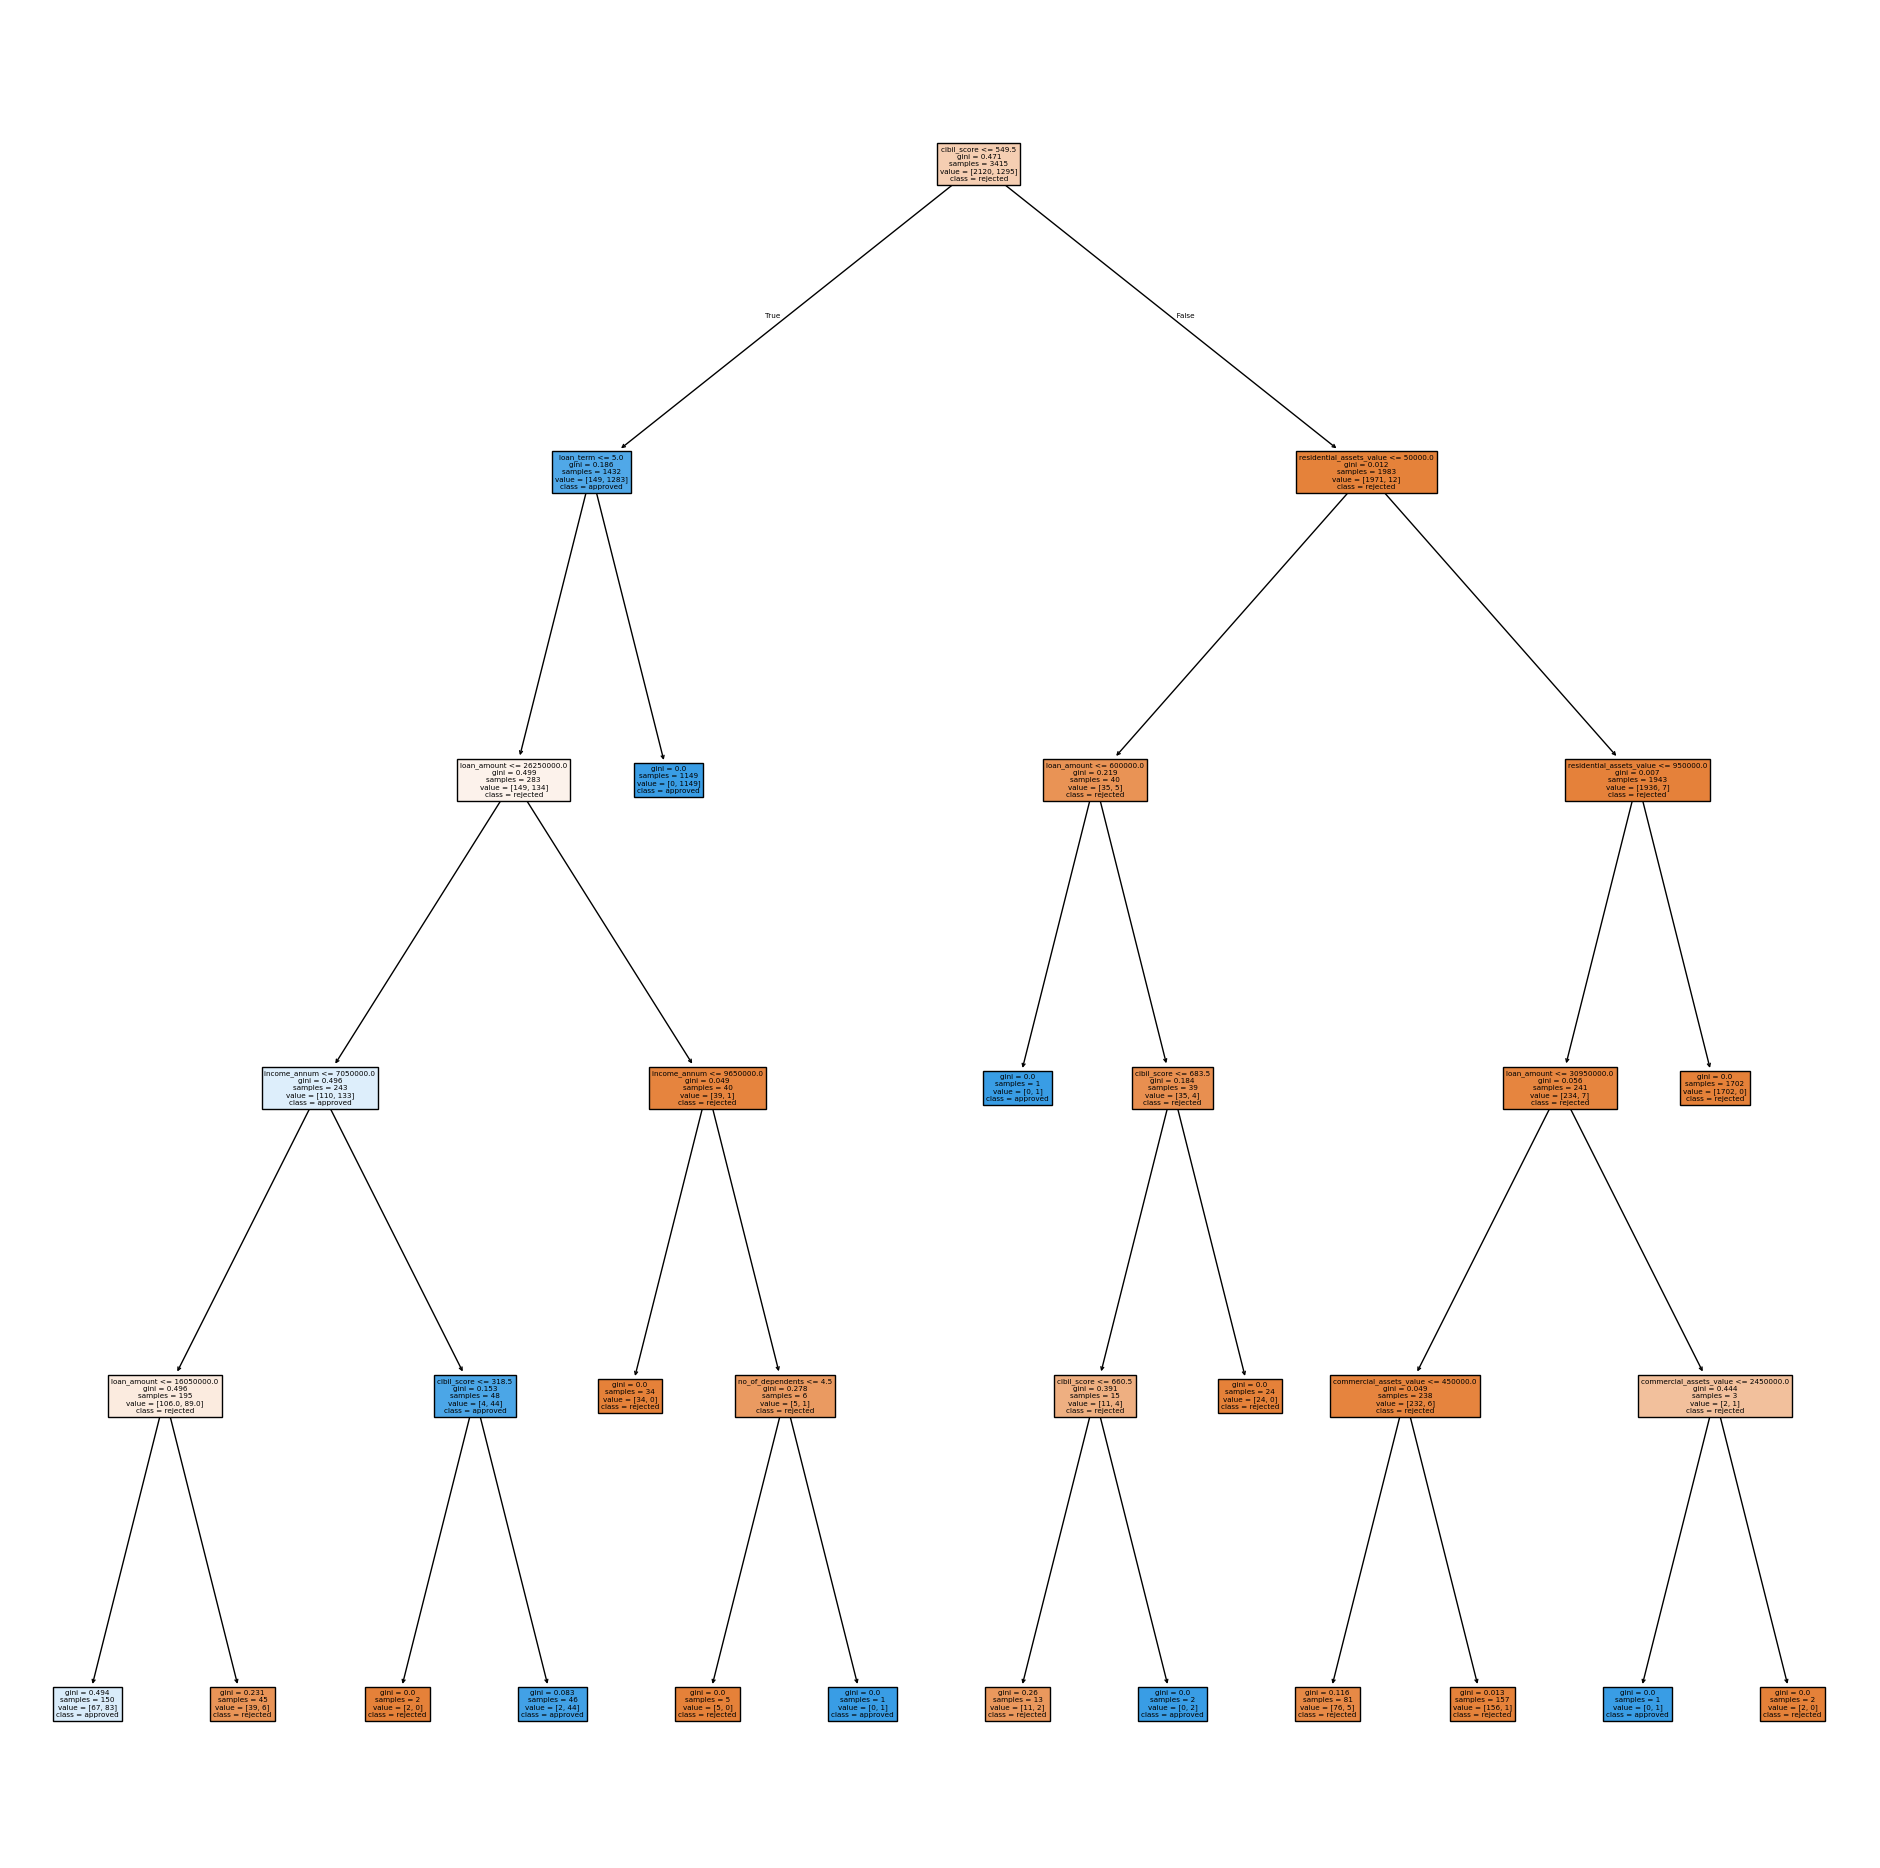

In [39]:
# Visualizing the decision tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(24,24))
plot_tree(model,feature_names=X.columns,class_names=['rejected','approved'],filled=True)
plt.show()

In [41]:
# Sample prediction
import numpy as np

def predict_loan_approval(model):
    # Collect user input
    no_of_dependents = int(input("Enter number of dependents: "))
    education = input("Enter education (Graduate/Not Graduate): ")
    self_employed = input("Are you self-employed? (Yes/No): ")
    income_annum = int(input("Enter annual income: "))
    loan_amount = int(input("Enter loan amount: "))
    loan_term = int(input("Enter loan term (in months): "))
    cibil_score = int(input("Enter CIBIL score: "))
    residential_assets_value = int(input("Enter residential assets value: "))
    commercial_assets_value = int(input("Enter commercial assets value: "))
    luxury_assets_value = int(input("Enter luxury assets value: "))
    bank_asset_value = int(input("Enter bank asset value: "))

    # Encode categorical variables
    education = 1 if education.lower() == "graduate" else 0
    self_employed = 1 if self_employed.lower() == "yes" else 0

    # Create an input array
    user_data = np.array([[no_of_dependents, education, self_employed, income_annum, 
                           loan_amount, loan_term, cibil_score, residential_assets_value, 
                           commercial_assets_value, luxury_assets_value, bank_asset_value]])

    # Make prediction
    prediction = model.predict(user_data)
    
    # Output result
    if prediction[0] == 1:
        print("✅ Loan Approved!")
    else:
        print("❌ Loan Rejected.")

# Call the function
predict_loan_approval(model)


❌ Loan Rejected.


c:\Users\brais\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
